# Planar data classification with one hidden layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

# set seed
np.random.seed(1)

In [2]:
# load dataset
X, Y = load_planar_dataset()

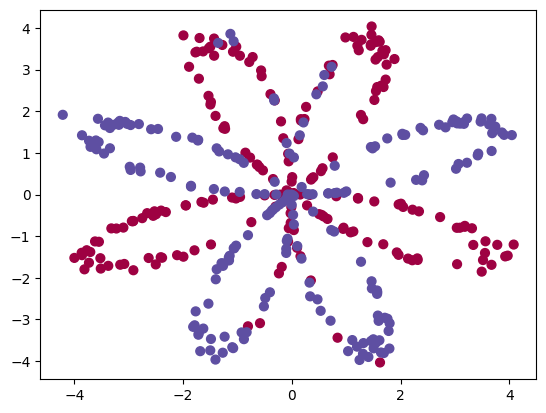

In [4]:
# visualize
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)

The colors represent the two categories of Y (red = 0, blue = 1). The axis of he graph are the two variables.

In [5]:
print(X.shape)

(2, 400)


In [6]:
print(Y.shape)

(1, 400)


We have 400 observations in the dataset.

### Logistic Regression

In [8]:
# testing logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T.reshape((400,)))

LogisticRegressionCV()

Accuracy: 0.47


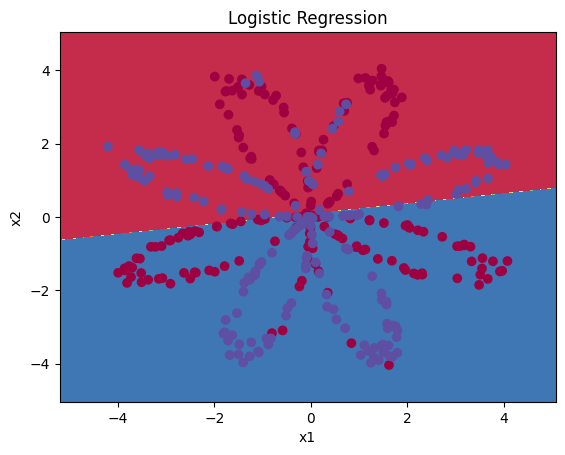

In [10]:
# plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('Logistic Regression')

# accuracy
LR_predictions = clf.predict(X.T)
print(f'Accuracy: {float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions))/float(Y.size))}')

Only 47% of the observations were classified correctly. The decision boundary is not good because the dataset is not linearly separable.

### Neural Network

**Build necessary functions:**

In [13]:
# defining layer sizes
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

In [14]:

# assessing (not the values we will use)
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [17]:
# defining initialization of parameters
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
# assessing
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [19]:
# forward propagation
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    # parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # forward pass
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [20]:
# assessing
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [25]:
# cost
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1]

    loss = np.multiply(Y,np.log(A2)) + np.multiply((1-Y),np.log(1-A2))
    cost = (-1/m) * np.sum(loss)
    cost = float(np.squeeze(cost))

    return cost

In [26]:
# assessing
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [29]:
# backward propagation
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # cache
    A1 = cache['A1']
    A2 = cache['A2']

    # parameters
    W1 = parameters['W1']
    W2 = parameters['W2']

    # gradients
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [30]:
# assessing
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [31]:
# gradient descent
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    # parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # gradients
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # update
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [32]:
# assessing
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [33]:
# build neural network
def nn_model(X, Y, n_h, learning_rate, num_iterations=1000, print_cost=False):

    # define layer sizes
    l_sizes = layer_sizes(X, Y)
    n_x = l_sizes[0]
    n_y = l_sizes[2]
    
    # initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # loop
    for i in range(0, num_iterations):

        # forward propagation
        A2, cache = forward_propagation(X, parameters)

        # compute cost
        cost = compute_cost(A2, Y, parameters)

        # back propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # update the parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # print costs if true
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    return parameters

In [34]:
# assessing
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, 1.02,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000257
Cost after iteration 2000: 0.000127
Cost after iteration 3000: 0.000084
Cost after iteration 4000: 0.000063
Cost after iteration 5000: 0.000050
Cost after iteration 6000: 0.000042
Cost after iteration 7000: 0.000036
Cost after iteration 8000: 0.000031
Cost after iteration 9000: 0.000028
W1 = [[-0.65400312  1.21068652]
 [-0.75688005  1.38443617]
 [ 0.57449374 -1.0957478 ]
 [ 0.76242342 -1.40517716]]
b1 = [[ 0.2841426 ]
 [ 0.34699428]
 [-0.23981061]
 [-0.35351855]]
W2 = [[-2.42329584 -3.22274999  1.97978376  3.31771228]]
b2 = [[0.20282644]]


In [35]:
# predict
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

In [36]:
# assessing
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


**Build model:**

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219663
Cost after iteration 9000: 0.218664


Text(0.5, 1.0, 'Neural Network')

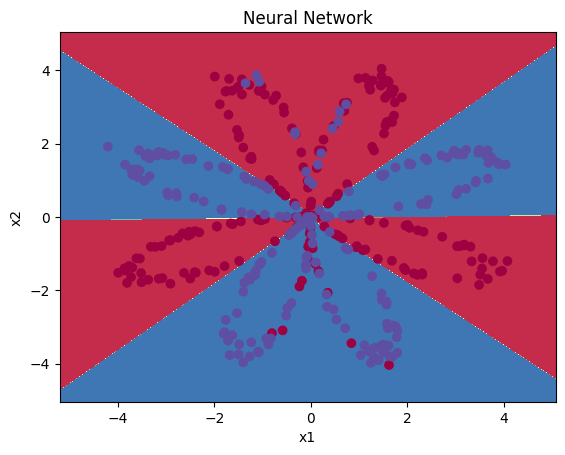

In [39]:
# train nn
parameters = nn_model(X, Y, 4, 1.2, num_iterations=10000, print_cost=True)

# plot decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title('Neural Network')

In [40]:
# accuracy
predictions = predict(parameters, X)
print(f'Accuracy: {float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size))}')

Accuracy: 0.905


**Tunning hidden layer size:**

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


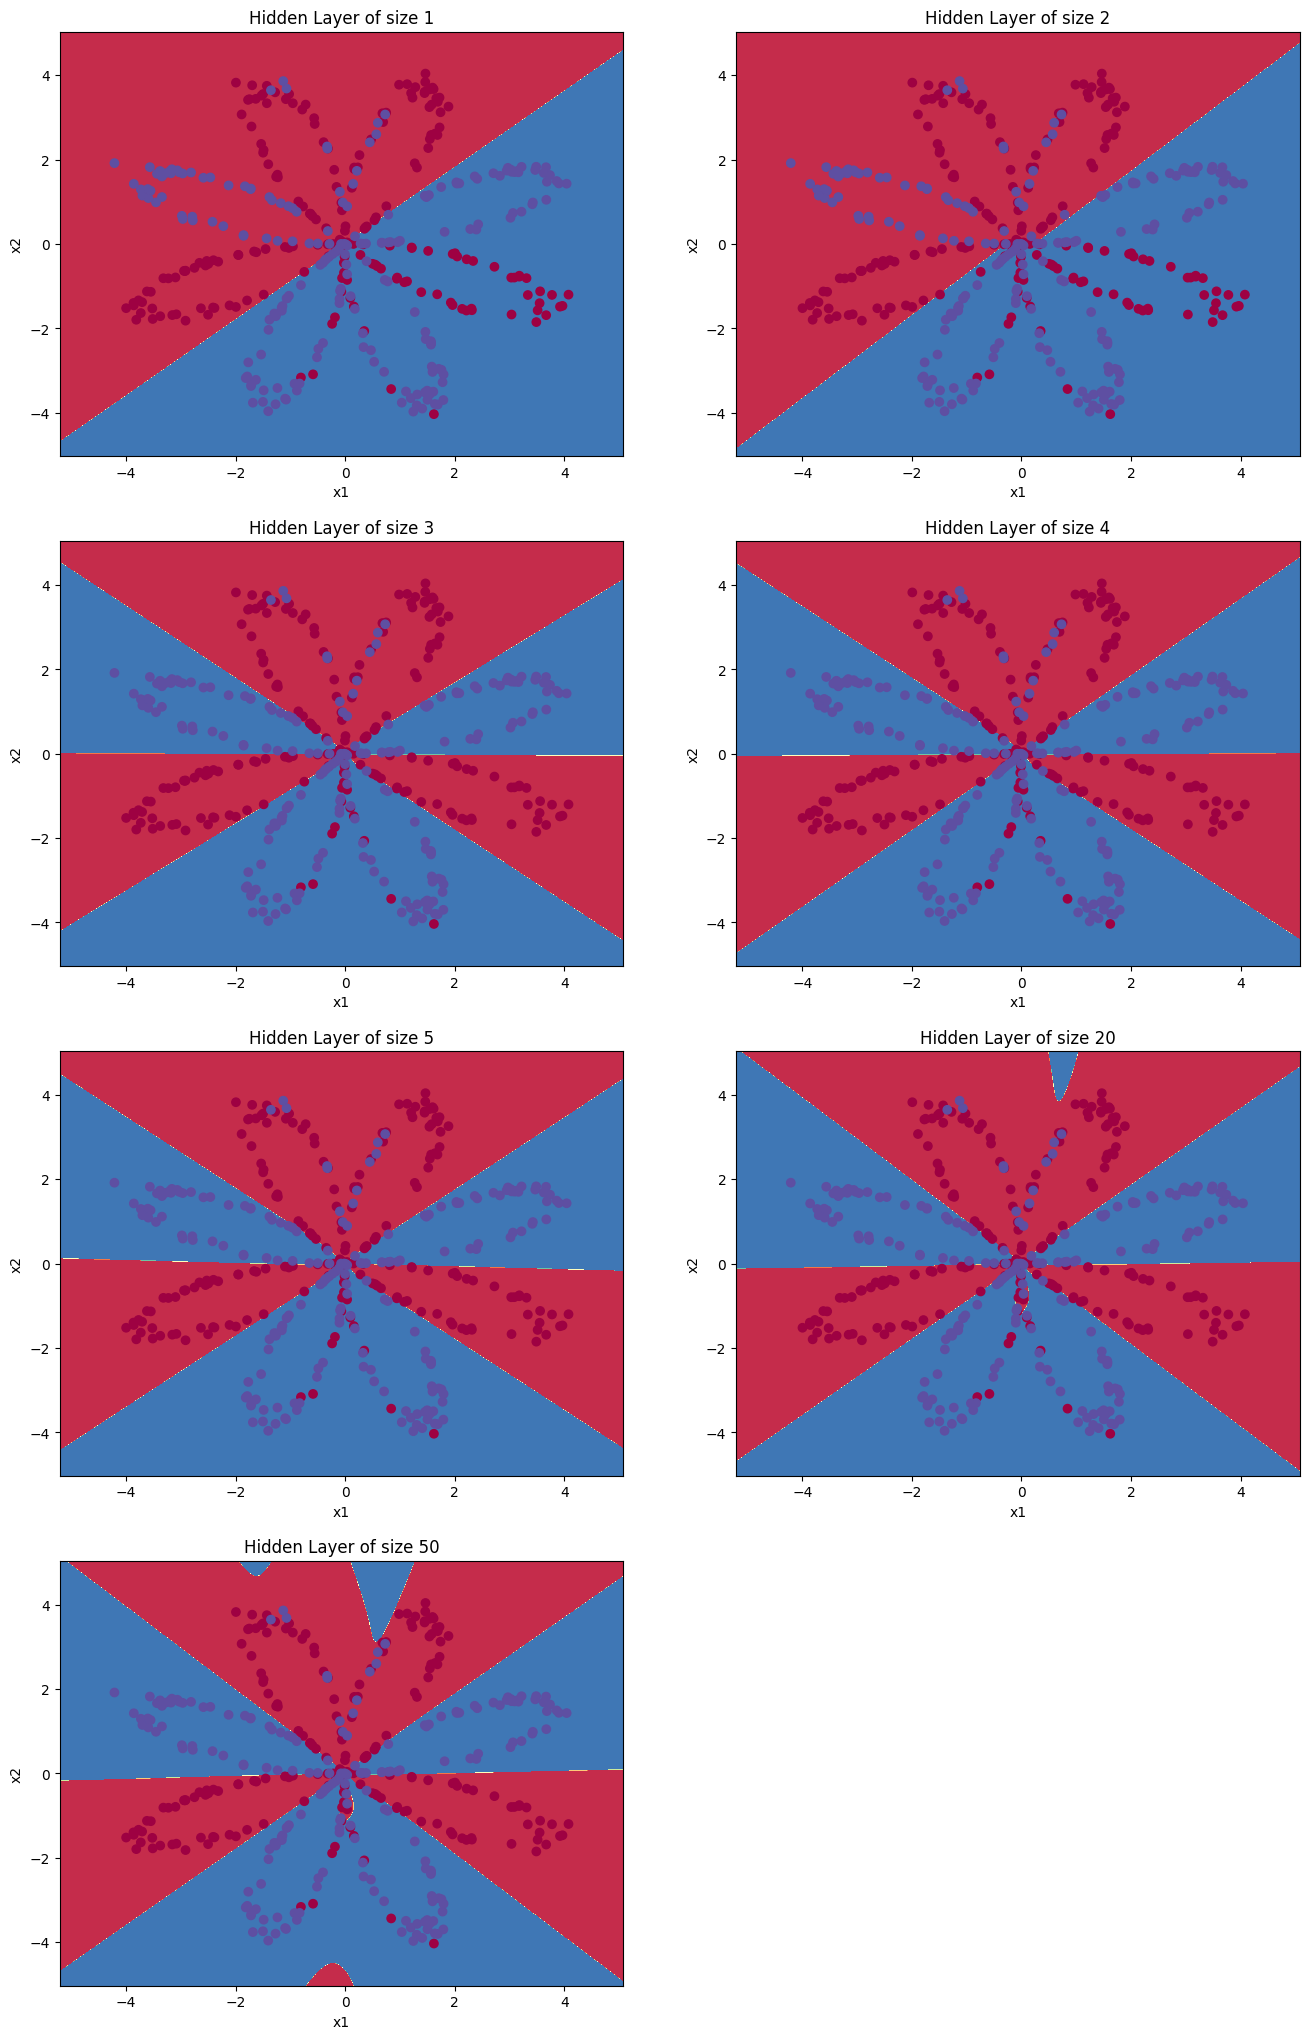

In [41]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

A NN with 5 nodes in the hidden layer has the best performance.

### Performance on other datasets

In [42]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

**Noisy circles:**

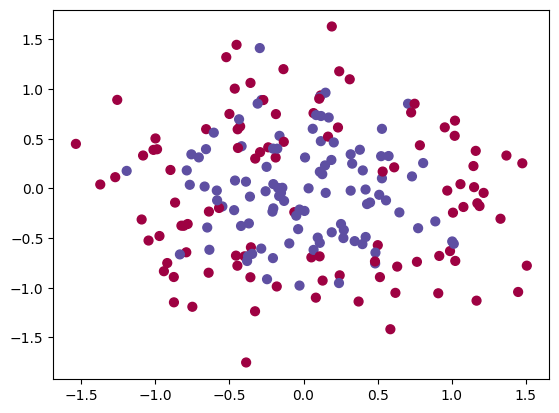

In [43]:
# choose dataset
dataset = 'noisy_circles'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693136
Cost after iteration 1000: 0.433244
Cost after iteration 2000: 0.418894
Cost after iteration 3000: 0.422435
Cost after iteration 4000: 0.422457
Cost after iteration 5000: 0.422639
Cost after iteration 6000: 0.422777
Cost after iteration 7000: 0.411430
Cost after iteration 8000: 0.399515
Cost after iteration 9000: 0.397122
Accuracy: 0.795


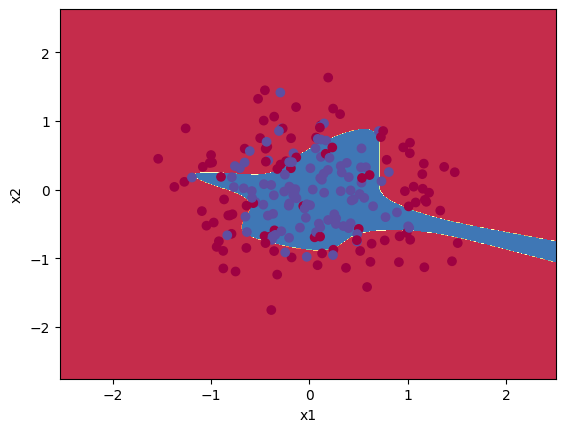

In [47]:
# train nn
parameters = nn_model(X, Y, 5, 1.2, num_iterations=10000, print_cost=True)

# plot decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# accuracy
predictions = predict(parameters, X)
print(f'Accuracy: {float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size))}')

**Noisy moons:**

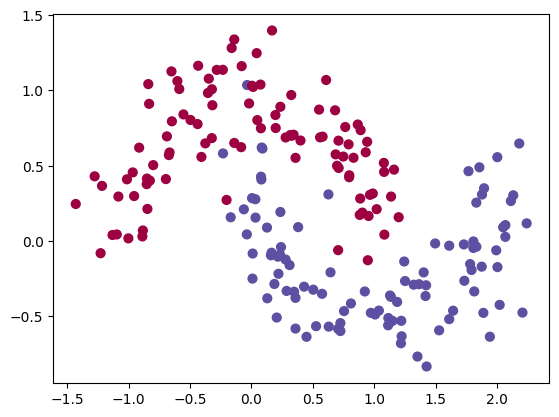

In [48]:
# choose dataset
dataset = 'noisy_moons'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.692992
Cost after iteration 1000: 0.167137
Cost after iteration 2000: 0.069092
Cost after iteration 3000: 0.063716
Cost after iteration 4000: 0.061312
Cost after iteration 5000: 0.059669
Cost after iteration 6000: 0.058364
Cost after iteration 7000: 0.057279
Cost after iteration 8000: 0.056359
Cost after iteration 9000: 0.055569
Accuracy: 0.985


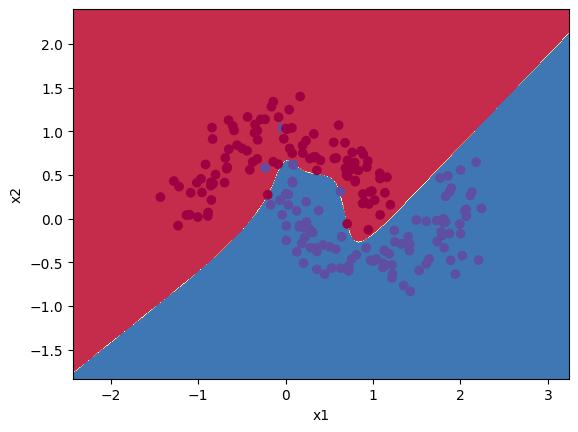

In [52]:
# train nn
parameters = nn_model(X, Y, 4, 1.2, num_iterations=10000, print_cost=True)

# plot decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# accuracy
predictions = predict(parameters, X)
print(f'Accuracy: {float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size))}')

**Blobs:**

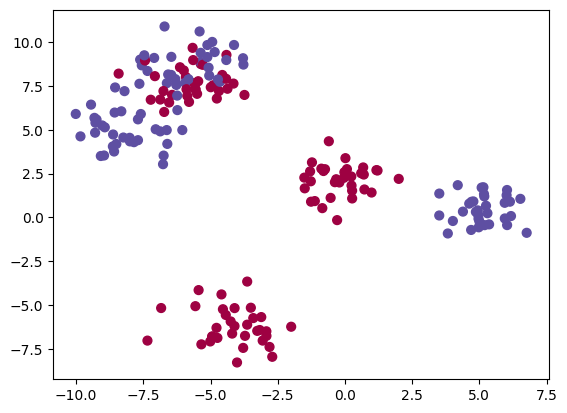

In [53]:
# choose dataset
dataset = 'blobs'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693207
Cost after iteration 1000: 0.324009
Cost after iteration 2000: 0.326184
Cost after iteration 3000: 0.324063
Cost after iteration 4000: 0.323521
Cost after iteration 5000: 0.323269
Cost after iteration 6000: 0.323123
Cost after iteration 7000: 0.323029
Cost after iteration 8000: 0.322962
Cost after iteration 9000: 0.322913
Accuracy: 0.83


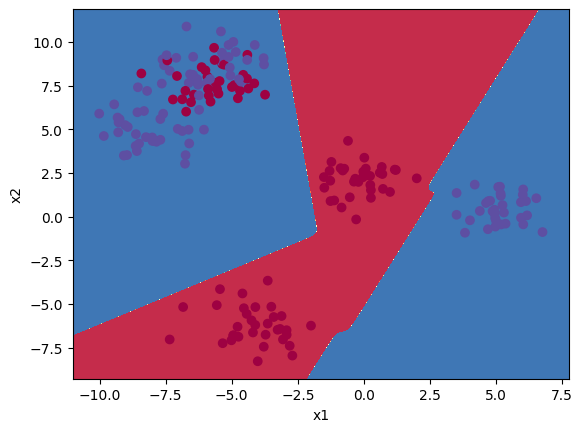

In [62]:
# train nn
parameters = nn_model(X, Y, 3, 1.2, num_iterations=10000, print_cost=True)

# plot decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# accuracy
predictions = predict(parameters, X)
print(f'Accuracy: {float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size))}')

**Gaussian quantiles:**

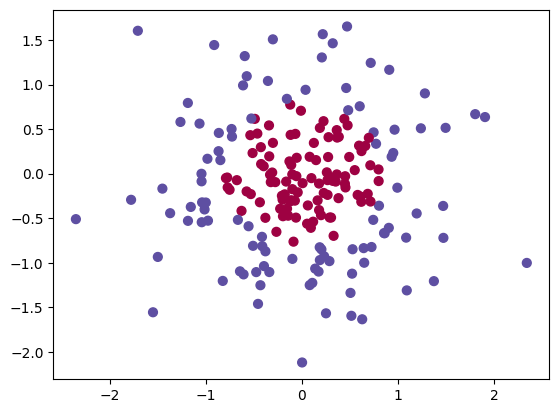

In [63]:
# choose dataset
dataset = 'gaussian_quantiles'

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693149
Cost after iteration 1000: 0.110815
Cost after iteration 2000: 0.085190
Cost after iteration 3000: 0.088995
Cost after iteration 4000: 0.076683
Cost after iteration 5000: 1.016945
Cost after iteration 6000: 0.074917
Cost after iteration 7000: 0.064967
Cost after iteration 8000: 0.066405
Cost after iteration 9000: 0.063480
Accuracy: 0.975


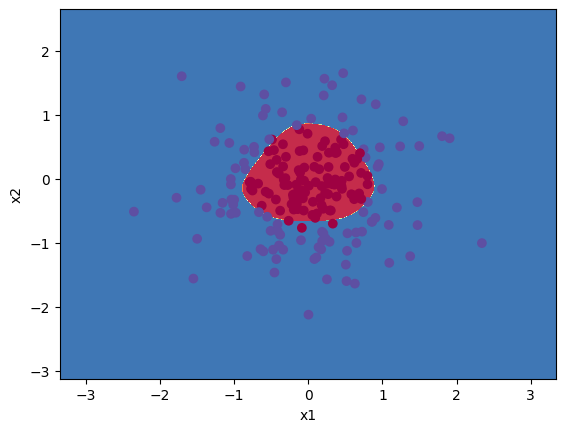

In [67]:
# train nn
parameters = nn_model(X, Y, 3, 1.2, num_iterations=10000, print_cost=True)

# plot decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# accuracy
predictions = predict(parameters, X)
print(f'Accuracy: {float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size))}')